In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image 

In [2]:
# generate batches of tensor image data with real-time data augmentation
datagen=ImageDataGenerator(rescale=1./255,rotation_range=30,horizontal_flip=True)
training_set=datagen.flow_from_directory(r"Project_Dataset\Training",
                                         target_size=(120,120),
                                         batch_size=300,
                                         class_mode='categorical')
test_set=datagen.flow_from_directory(r"Project_Dataset\Testing",
                                         target_size=(120,120),
                                         batch_size=300,
                                         class_mode='categorical')
class_labels={0:"Early_Blight",1:"Healthy",2:"Late_Blight"}

Found 3251 images belonging to 3 classes.
Found 405 images belonging to 3 classes.


In [3]:
model=Sequential()
model.add(Conv2D(32,(3,3), input_shape=(120,120,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 128)      0

In [4]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(training_set,epochs=60,validation_data=test_set)

Epoch 1/60
11/11 [==============================] - 93s 8s/step - loss: 1.7873 - accuracy: 0.3537 - val_loss: 1.1050 - val_accuracy: 0.4444
Epoch 2/60
11/11 [==============================] - 45s 4s/step - loss: 1.0671 - accuracy: 0.4208 - val_loss: 1.0126 - val_accuracy: 0.4790
Epoch 3/60
11/11 [==============================] - 33s 3s/step - loss: 0.9897 - accuracy: 0.4968 - val_loss: 0.9960 - val_accuracy: 0.5111
Epoch 4/60
11/11 [==============================] - 33s 3s/step - loss: 0.9599 - accuracy: 0.5211 - val_loss: 0.9380 - val_accuracy: 0.5432
Epoch 5/60
11/11 [==============================] - 33s 3s/step - loss: 0.9381 - accuracy: 0.5466 - val_loss: 0.9109 - val_accuracy: 0.5605
Epoch 6/60
11/11 [==============================] - 33s 3s/step - loss: 0.9009 - accuracy: 0.5807 - val_loss: 0.8945 - val_accuracy: 0.5753
Epoch 7/60
11/11 [==============================] - 33s 3s/step - loss: 0.8798 - accuracy: 0.6035 - val_loss: 0.8630 - val_accuracy: 0.6272
Epoch 8/60
11/11 [==

11/11 [==============================] - 32s 3s/step - loss: 0.1517 - accuracy: 0.9468 - val_loss: 0.2062 - val_accuracy: 0.9235
Epoch 60/60
11/11 [==============================] - 32s 3s/step - loss: 0.1451 - accuracy: 0.9508 - val_loss: 0.2266 - val_accuracy: 0.9383


1/1 [==============================] - 0s 34ms/step
Predicted Label is:  Early_Blight


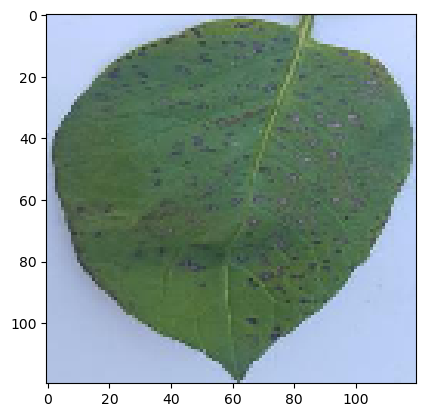

In [16]:
img = image.load_img(r"Project_Dataset\Validation\Early_Blight\Early_Blight_3.jpg",target_size=(120,120,3))
plt.imshow(img)

test_img=np.asarray(img)
test_img.shape

test_img=test_img.reshape(1,120,120,3)
yhat=model.predict(test_img)
predicted_class = np.argmax(yhat[0])
predicted_labels=class_labels[predicted_class]
print("Predicted Label is: ",predicted_labels)

1/1 [==============================] - 0s 109ms/step
Predicted Label is:  Healthy


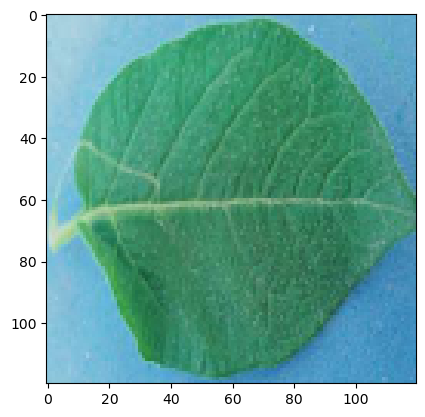

In [9]:
img = image.load_img(r"Project_Dataset\Validation\Healthy\Healthy_5.jpg",target_size=(120,120,3))
plt.imshow(img)

test_img=np.asarray(img)
test_img.shape

test_img=test_img.reshape(1,120,120,3)
yhat=model.predict(test_img)
predicted_class = np.argmax(yhat[0])
predicted_labels=class_labels[predicted_class]
print("Predicted Label is: ",predicted_labels)

1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Late_Blight


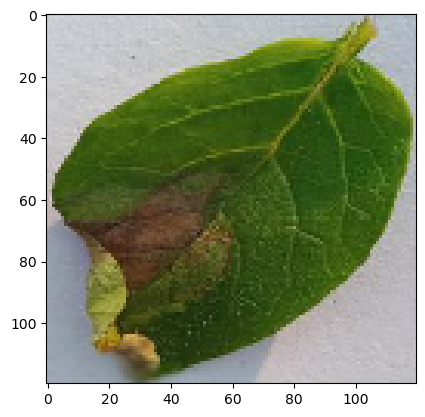

In [10]:
img = image.load_img(r"Project_Dataset\Validation\Late_Blight\Late_Blight_3.jpg",target_size=(120,120,3))
plt.imshow(img)

test_img=np.asarray(img)
test_img.shape

test_img=test_img.reshape(1,120,120,3)
yhat=model.predict(test_img)
predicted_class = np.argmax(yhat[0])
predicted_labels=class_labels[predicted_class]
print("Predicted Label is: ",predicted_labels)

In [11]:
for i in range(1,164):
    img = image.load_img(f"Project_Dataset\Validation\Early_Blight\Early_Blight_{i}.jpg",target_size=(120,120,3))
    test_img=np.asarray(img)
    test_img=test_img.reshape(1,120,120,3)
    yhat=model.predict(test_img)
    predicted_class = np.argmax(yhat[0])
    predicted_labels=class_labels[predicted_class]
    print("Predicted Label is: ",predicted_labels)

1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 16ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 26ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 26ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 22ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 31ms/step
Pr

1/1 [==============================] - 0s 16ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 25ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 16ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 16ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 16ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 16ms/step
Pr

In [13]:
for i in range(1,60):
    img = image.load_img(f"Project_Dataset\Validation\Healthy\Healthy_{i}.jpg",target_size=(120,120,3))
    test_img=np.asarray(img)
    test_img=test_img.reshape(1,120,120,3)
    yhat=model.predict(test_img)
    predicted_class = np.argmax(yhat[0])
    predicted_labels=class_labels[predicted_class]
    print("Predicted Label is: ",predicted_labels)

1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Late_Blight
1/1 [==============================] - 0s 16ms/step
Predicted Label is:  Healthy
1/1 [==============================] - 0s 16ms/step
Predicted Label is:  Healthy
1/1 [==============================] - 0s 16ms/step
Predicted Label is:  Healthy
1/1 [==============================] - 0s 16ms/step
Predicted Label is:  Healthy
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Healthy
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Early_Blight
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Healthy
1/1 [==============================] - 0s 24ms/step
Predicted Label is:  Healthy
1/1 

In [14]:
for i in range(1,71):
    img = image.load_img(f"Project_Dataset\Validation\Late_Blight\Late_Blight_{i}.jpg",target_size=(120,120,3))
    test_img=np.asarray(img)
    test_img=test_img.reshape(1,120,120,3)
    yhat=model.predict(test_img)
    predicted_class = np.argmax(yhat[0])
    predicted_labels=class_labels[predicted_class]
    print("Predicted Label is: ",predicted_labels)

1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Late_Blight
1/1 [==============================] - 0s 27ms/step
Predicted Label is:  Late_Blight
1/1 [==============================] - 0s 16ms/step
Predicted Label is:  Late_Blight
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Late_Blight
1/1 [==============================] - 0s 16ms/step
Predicted Label is:  Late_Blight
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Late_Blight
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Late_Blight
1/1 [==============================] - 0s 29ms/step
Predicted Label is:  Late_Blight
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Late_Blight
1/1 [==============================] - 0s 31ms/step
Predicted Label is:  Late_Blight
1/1 [==============================] - 0s 26ms/step
Predicted Label is:  Late_Blight
1/1 [==============================] - 0s 31ms/step
Predicted Lab

1/1 [==============================] - 0s 16ms/step
Predicted Label is:  Healthy


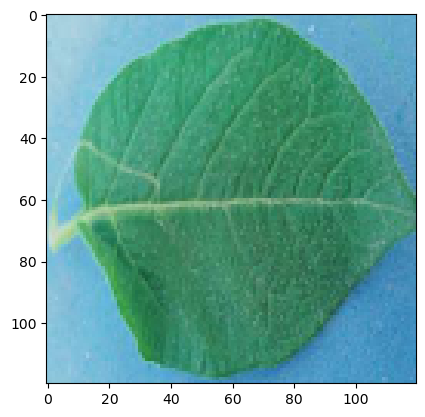

In [32]:
img = image.load_img(r"D:\Healthy.jpg",target_size=(120,120,3))
plt.imshow(img)

test_img=np.asarray(img)
test_img.shape

test_img=test_img.reshape(1,120,120,3)
yhat=model.predict(test_img)
predicted_class = np.argmax(yhat[0])
predicted_labels=class_labels[predicted_class]
print("Predicted Label is: ",predicted_labels)